In [44]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [45]:
# Data_Cleaning import 
Dataset = pd.read_csv("Datasets/Dataset_update")

# Create a data frame
Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,5.397605e-79
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.000000e+00


In [46]:
# Comparing "Race" with "Minutes of Vigorous Recreation Daily," "Minutes of Moderate Recreation Daily", and 
# "Minutes of Sedentary Activity Daily" compared to sleep constants

# Sleep constants: "Sleep Hours Week/Workdays", "Sleep Hours Weekends"

Race_update = Dataset.drop(columns=['Number of Rx Meds', 'Gender', 'Age at Screening', 'Educational Attainment',
                                     'Family Income to Poverty Ratio', 'Minutes of Vigorous Work Daily',	
                                     'Minutes of Moderate Work Daily',
                                     'Told Doctor About Sleep Issues', 'Feeling Tired During Day Frequency'
    
                     ])
Race_update

,Respondent ID,Race,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends
0,109263.0,6.0,NaN,NaN,NaN,NaN,NaN
1,109264.0,1.0,NaN,NaN,NaN,NaN,NaN
2,109265.0,3.0,NaN,NaN,NaN,NaN,NaN
3,109266.0,6.0,60.0,30.0,480.0,7.5,8.0
4,109267.0,2.0,90.0,NaN,540.0,8.0,8.0
...,...,...,...,...,...,...,...
32957,124821.0,4.0,NaN,NaN,60.0,8.0,9.0
32958,124821.0,4.0,NaN,NaN,60.0,8.0,9.0
32959,124821.0,4.0,NaN,NaN,60.0,8.0,9.0
32960,124822.0,2.0,45.0,60.0,240.0,5.5,8.0


In [47]:
Race_update.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32962 entries, 0 to 32961
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         32962 non-null  float64
 1   Race                                  32962 non-null  float64
 2   Minutes of Vigorous Recreation Daily  4063 non-null   float64
 3   Minutes of Moderate Recreation Daily  8891 non-null   float64
 4   Minutes of Sedentary Activity Daily   26243 non-null  float64
 5   Sleep Hours Week/Workdays             26545 non-null  float64
 6   Sleep Hours Weekends                  26574 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [48]:

percent_missing = Race_update.isnull().sum() * 100 / len(Race_update)
missing_value_df = pd.DataFrame({'column_name': Race_update.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Respondent ID,Respondent ID,0.000000
Race,Race,0.000000
Sleep Hours Weekends,Sleep Hours Weekends,19.379892
Sleep Hours Week/Workdays,Sleep Hours Week/Workdays,19.467872
Minutes of Sedentary Activity Daily,Minutes of Sedentary Activity Daily,20.384079
Minutes of Moderate Recreation Daily,Minutes of Moderate Recreation Daily,73.026515
Minutes of Vigorous Recreation Daily,Minutes of Vigorous Recreation Daily,87.673685


In [ ]:
# Something to consider: A lot of missing data for moderate and vigorous recreation minutes

In [49]:
race_dict = {
    1.0 : "Mex-Am",
    2.0 : "Other Hisp",
    3.0 : "White",
    4.0 : "Black", 
    6.0 : "Asian",
    7.0 : "Other/Multi",
    
}
Race_update["Race"] = Race_update["Race"].map(race_dict)
Race_update.head()

,Respondent ID,Race,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends
0,109263.0,Asian,NaN,NaN,NaN,NaN,NaN
1,109264.0,Mex-Am,NaN,NaN,NaN,NaN,NaN
2,109265.0,White,NaN,NaN,NaN,NaN,NaN
3,109266.0,Asian,60.0,30.0,480.0,7.5,8.0
4,109267.0,Other Hisp,90.0,NaN,540.0,8.0,8.0


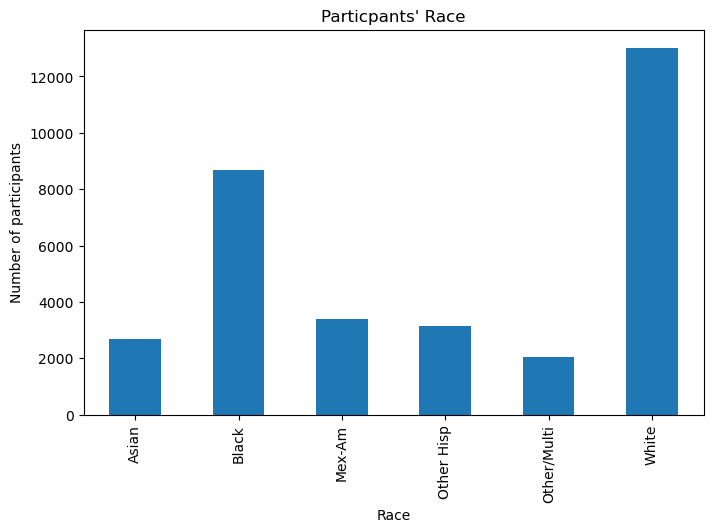

<Figure size 640x480 with 0 Axes>

In [50]:
# Group the levels of edu together to later compare with activity level

group_race = Race_update.groupby('Race')
count_types = group_race['Race'].count()

count_types

barchart_race =  count_types.plot(kind='bar', figsize=(8,5))
barchart_race.set_title("Particpants' Race")
barchart_race.set_xlabel("Race")
#barchart_edu.xticks
barchart_race.set_ylabel("Number of participants")
plt.show()
plt.tight_layout()


In [51]:
Race_stats = Race_update.drop(columns=['Respondent ID'])
Race_stats.head()

,Race,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends
0,Asian,NaN,NaN,NaN,NaN,NaN
1,Mex-Am,NaN,NaN,NaN,NaN,NaN
2,White,NaN,NaN,NaN,NaN,NaN
3,Asian,60.0,30.0,480.0,7.5,8.0
4,Other Hisp,90.0,NaN,540.0,8.0,8.0


In [52]:
race_and_sleep = Race_stats.groupby("Race").mean()
race_and_sleep

,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends
Race,,,,,
Asian,70.083507,51.372506,367.175804,7.577502,8.202834
Black,171.411932,66.722395,432.507435,7.532138,8.091702
Mex-Am,132.327586,56.891566,424.623105,7.858250,8.737157
Other Hisp,78.147139,60.353612,354.553816,7.830012,8.512044
Other/Multi,69.471154,68.773672,432.286443,7.760504,8.188600
White,70.178197,68.339761,483.510474,7.905871,8.256146


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

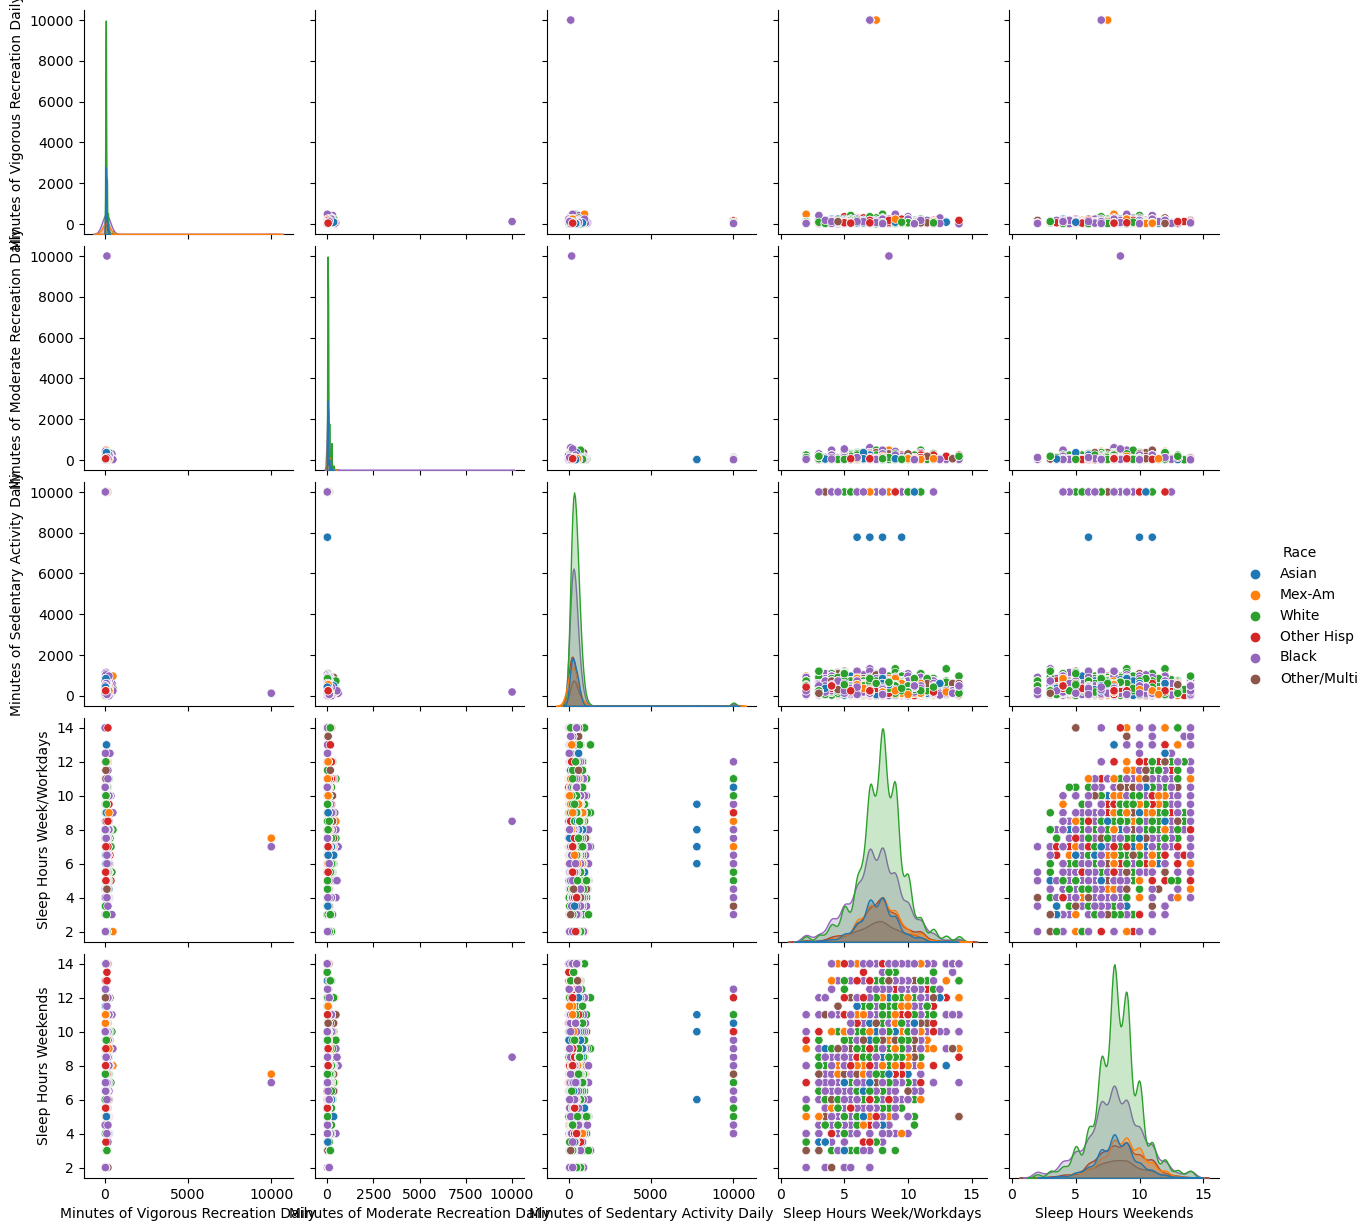

In [25]:
sns.pairplot(Race_stats, hue = "Race")
# Tutor's idea to get a better picture of the data

In [73]:
#Generate a scatter plot of largest race group (White) vs. their weekday sleep length

avg_weekday_sleep = Race_stats["Sleep Hours Week/Workdays"].mean()
print(avg_weekday_sleep) 

avg_weekend_sleep = Race_stats["Sleep Hours Weekends"].mean()
print(avg_weekend_sleep) 



7.760161989075155
8.27498682923158


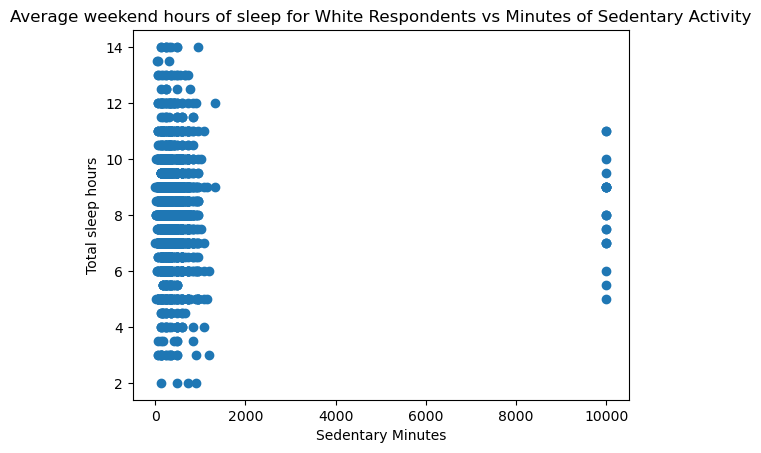

In [68]:
#Generate a scatter plot of weekday sleep vs. sedentary minutes for white respondents

white_avg = Race_update.loc[Race_update["Race"] == "White", ["Respondent ID", "Minutes of Sedentary Activity Daily", "Sleep Hours Weekends"]]
average_sed = white_avg.groupby('Respondent ID')["Minutes of Sedentary Activity Daily"].mean()
weekend_sleep = white_avg.groupby('Respondent ID')["Sleep Hours Weekends"].mean()

plt.scatter(average_sed, weekend_sleep)
plt.title("Average weekend hours of sleep for White Respondents vs Minutes of Sedentary Activity")
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total sleep hours')
plt.show()

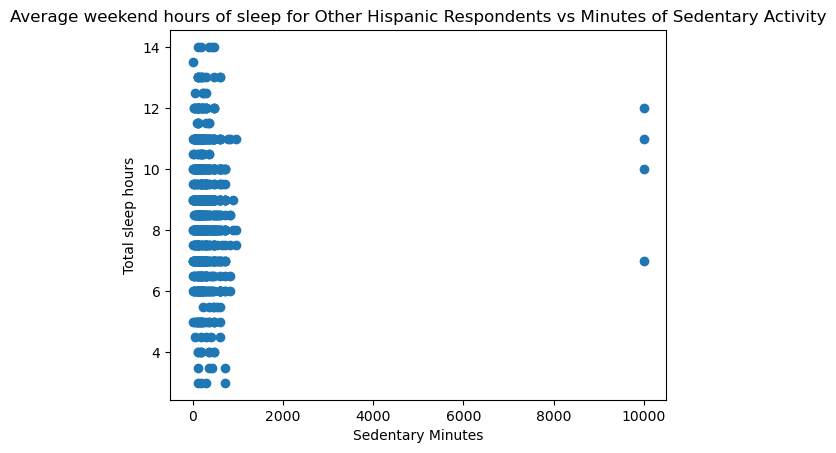

In [69]:
othHisp_avg = Race_update.loc[Race_update["Race"] == "Other Hisp", ["Respondent ID", "Minutes of Sedentary Activity Daily", "Sleep Hours Weekends"]]
average_sed = othHisp_avg.groupby('Respondent ID')["Minutes of Sedentary Activity Daily"].mean()
weekend_sleep = othHisp_avg.groupby('Respondent ID')["Sleep Hours Weekends"].mean()

plt.scatter(average_sed, weekend_sleep)
plt.title("Average weekend hours of sleep for Other Hispanic Respondents vs Minutes of Sedentary Activity")
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total sleep hours')
plt.show()

In [ ]:
# Analysis: